In [2]:
import numpy as np
from tqdm import tqdm
from math import sqrt,exp
import matplotlib
from matplotlib import pyplot as plt
from multiprocessing import Pool
from itertools import product
from qutip import *
font = {'size'   : 17}
matplotlib.rc('font', **font)
matplotlib.rcParams['text.usetex'] = True
# plt.rcParams["figure.figsize"]= 10, 7
plt.rcParams['figure.dpi'] = 100
matplotlib.rcParams['lines.linewidth'] = 2
plt.rcParams['axes.grid'] = True

global eta
eta = 0.2      # width of broadening function

# Comparison with 1D chain $(N > 2)$

In [3]:
def hopping(t, N):
    H_hop = 0
    for i in range(N):
        for spin in ['u', 'd']:
            if spin == 'u':
                op = [create(2), identity(2)]
            else:
                op = [identity(2), destroy(2)]
            pre = [identity(2)]*2*i
            site_i = op
            if i == N-1:
                pre  = op + pre[2:]
                site_j = []
                post = []
            else:
                site_j = op
                post = [identity(2)]*2*(N - i - 2)
            H_hop += tensor(pre+site_i+site_j+post)
    H_hop *= -t
    return H_hop + H_hop.dag()


def onsite(U, N):
    H_ons = 0
    for i in range(N):
        pre = [identity(2)]*2*i
        site_i = [create(2)*destroy(2) - 0.5, create(2)*destroy(2) - 0.5]
        post = [identity(2)]*2*(N - i - 1)
        H_ons += tensor(pre+site_i+post)
    return U*H_ons

100%|████████████████████████████████████████████████████████████████████████████████████████████| 600/600 [00:06<00:00, 87.90it/s]

-2.400000000000013 0.0003440967385651033
-0.8000000000000469 1.4101083506726897
0.799999999999919 1.4101083506726872
2.399999999999885 0.00034409673856503585


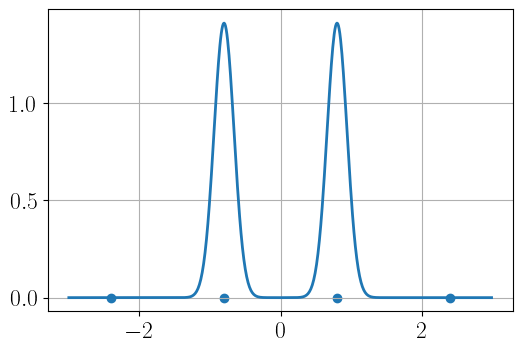

In [43]:
def rho_at_w(args):
    (En, Xn), X0, w = args
    Z = 1
    E0 = E[0]
    c0_up = tensor([identity(2)]*2*(N-1) + [destroy(2), identity(2)])
    C1 = X0.dag()*c0_up*Xn
    C1_sq = np.real((C1*C1.dag())[0][0][0])
    C2 = Xn.dag()*c0_up*X0
    C2_sq = np.real((C2*C2.dag())[0][0][0])
    x1=w + E0 - En
    x2=w + En - E0
    return (C1_sq * exp(-(x1/eta)**2)/(eta*sqrt(np.pi)) + C2_sq * exp(-(x2/eta)**2)/(eta*sqrt(np.pi))) / Z

    
t = 0.4
U = 0.1
td = 2*t
delta = sqrt(U**2 + 16*td**2)
ham = 0
N = 2
ham += hopping(t, N)
ham += onsite(U, N)
E, X = ham.eigenstates()
E0 = E[np.where(E == min(E))]
X0 = X[np.where(E == min(E))]
Z = len(E0)
plt.scatter([delta/2 + td, delta/2 - td, -delta/2 - td, -delta/2 + td], [0,0,0,0])
exc = zip(E[1:], X[1:])
gs = X0
rho = []
w_range = np.arange(-3,3,0.01)
for w in tqdm(w_range):
    rho_w = sum(map(rho_at_w, product(zip(E[1:], X[1:]), X0, [w])))
    rho.append(rho_w)
    
for i in range(1, len(w_range)-1):
    if rho[i-1] < rho[i] and rho[i+1] < rho[i]:
        print (w_range[i], rho[i])

plt.plot(w_range, rho)
plt.show()

-2.400000000000013 0.0003440967385650802
-0.8000000000000469 1.4101083506726917
0.799999999999919 1.4101083506726846
2.399999999999885 0.0003440967385650785


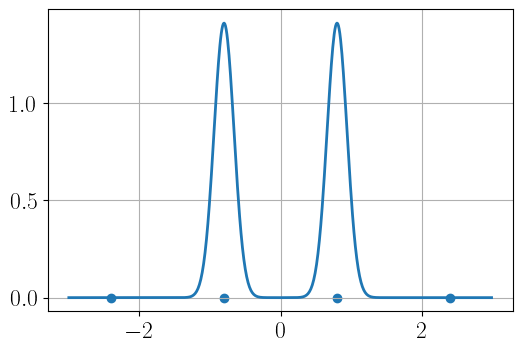

In [49]:
def gauss(x):
    return exp(-(x/eta)**2)/(eta*sqrt(np.pi))


td = t * 2
delta = sqrt(U**2 + 16*td**2)
w_range = np.arange(-3, 3, 0.01)
rho = []
plt.scatter([delta/2 + td, delta/2 - td, -delta/2 - td, -delta/2 + td], [0,0,0,0])
for w in w_range:
    rho.append((1/4 - td/delta)*(gauss(w - delta/2 - td) + gauss(w + delta/2 + td)) +  (1/4 + td/delta)*(gauss(w - delta/2 + td) + gauss(w + delta/2 - td)))

for i in range(1, len(w_range)-1):
    if rho[i-1] < rho[i] and rho[i+1] < rho[i]:
        print (w_range[i], rho[i])
        
plt.plot(w_range, rho)
plt.show()

100%|████████████████████████████████████████████████████████████████████████████████████████████| 600/600 [00:29<00:00, 20.20it/s]


-2.0800000000000196 0.000125333676248917
-1.400000000000034 0.0019769268490010096
-0.6900000000000492 0.9560809207470569
-0.010000000000063736 1.2455494838465326
0.6899999999999213 0.30412099547849647
1.3999999999999062 0.2865944601545367


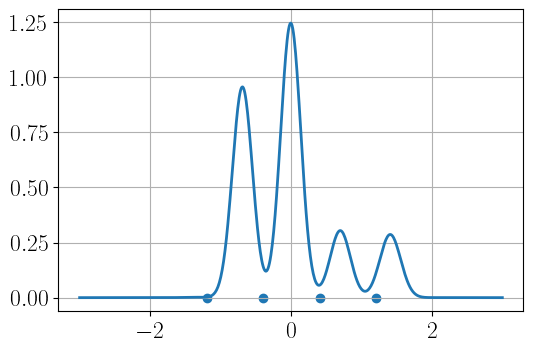

In [50]:
def rho_at_w(args):
    (En, Xn), X0, w = args
    Z = 1
    E0 = E[0]
    c0_up = tensor([identity(2)]*2*(N-1) + [destroy(2), identity(2)])
    C1 = X0.dag()*c0_up*Xn
    C1_sq = np.real((C1*C1.dag())[0][0][0])
    C2 = Xn.dag()*c0_up*X0
    C2_sq = np.real((C2*C2.dag())[0][0][0])
    x1=w + E0 - En
    x2=w + En - E0
    return (C1_sq * exp(-(x1/eta)**2)/(eta*sqrt(np.pi)) + C2_sq * exp(-(x2/eta)**2)/(eta*sqrt(np.pi))) / Z

    
t = 0.4
U = 0.1
td = t
delta = sqrt(U**2 + 16*td**2)
ham = 0
N = 3
ham += hopping(t, N)
ham += onsite(U, N)
E, X = ham.eigenstates()
E0 = E[np.where(E == min(E))]
X0 = X[np.where(E == min(E))]
Z = len(E0)
plt.scatter([delta/2 + td, delta/2 - td, -delta/2 - td, -delta/2 + td], [0,0,0,0])
exc = zip(E[1:], X[1:])
gs = X0
rho = []
w_range = np.arange(-3,3,0.01)
for w in tqdm(w_range):
    rho_w = sum(map(rho_at_w, product(zip(E[1:], X[1:]), X0, [w])))
    rho.append(rho_w)
    
for i in range(1, len(w_range)-1):
    if rho[i-1] < rho[i] and rho[i+1] < rho[i]:
        print (w_range[i], rho[i])

plt.plot(w_range, rho)
plt.show()

-2.160000000000039 2.2915005670448196
2.1599999999998687 1.5862911974402845
2.9599999999998516 0.5293373821755648


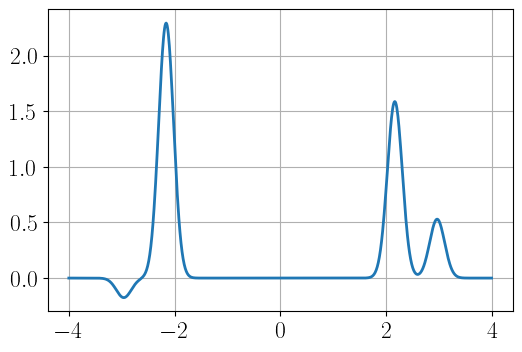

In [66]:
def gauss(x):
    return exp(-(x/eta)**2)/(eta*sqrt(np.pi))


td = 2*t
U = 4
delta = sqrt(U**2 + 16*td**2)
cp = 1/4 + td/delta
cm = 1/4 - td/delta
w_range = np.arange(-4, 4, 0.01)
rho = []
for w in w_range:
    rho_w = (1/2)*((3*cm - cp)*gauss(w + delta/2 + t) + 4*cm*gauss(w - delta/2 - t) + (3*cp - cm)*gauss(w - delta/2 + t) + 4*cp*gauss(w + delta/2 - t))
    rho.append(rho_w)

for i in range(1, len(w_range)-1):
    if rho[i-1] < rho[i] and rho[i+1] < rho[i]:
        print (w_range[i], rho[i])
        
plt.plot(w_range, rho)
plt.show()